# **Classification Project: Churn for bank Customers**


## **Introduction**

> The purpose of the model I plan to build is to predict whether an individual customer will churn from the bank (or not) given various data points and information from a historical data.
>
>So in the future, when we have a customer, we can predict if this person will leave or not. This will help with the decision making framework for whether a customer will leave or not.
>
>With this prediction model, the bank will benefit from being able to predict the risk of the customer on whether they will leave or not.

### Goals
> 
> To predict if the customer will churn from the bank or not.



### Data Description
> 
> I will take the data from [Kaggle](https://www.kaggle.com/mathchi/churn-for-bank-customers), I plan to use these **classes & features**:
>
 | class  |  Description |
 | ------------- | ------------- |
 | exited  | customer will leave |
 | Stays | customer will stay |

 >
 ----
 >
 | Feature  |  description |
 | ------------- | ------------- |
 | RowNumber | corresponds to the record (row) number.|
 | CustomerId | Customer ID's|
 | Surname | the surname of a customer. |
 | CreditScore | a number between 300–850 that depicts a consumer's creditworthiness.|
 | Geography | a customer’s location.|
 | Gender | either if a customer is male or female. |
 | Age | customer's age |
 | Tenure | refers to the number of years that the customer has been a client of the bank.|
 | Balance | customer's account balance |
 | NumOfProducts | refers to the number of products that a customer has purchased through the bank. |
 | HasCrCard | denotes whether or not a customer has a credit card.|
 | IsActiveMember | if the customer is active or not.|
 | EstimatedSalary | customer's salary. |
 

In [9]:
#Cleaning, EDA, and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [112]:
!pip install imblearn
!pip install xgboost
!pip install dabl

In [113]:
#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC 
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
import dabl

### **Data Wrangling**

In [12]:
#Load the dataset into a dataframe
url = 'https://raw.githubusercontent.com/AbdulelahMaj/T5_Classification_Project/main/Customers_Churn.csv'
df = pd.read_csv(url)

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Apparently we don’t have null values in our dataframe.

In [15]:
df.shape

(10000, 14)

#### Unused columns that we will drop them from the dataframe:
> - RowNumber
> - CustomerId
> - Surname

In [16]:
df.drop(columns=['RowNumber', 'CustomerId','Surname'],inplace=True)

In [17]:
df.duplicated().sum()

0

##### we don’t have any duplicated rows

#### We have some numerical and categorical features, so we should see it’s distribution.

In [18]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##### from above table it looks we don’t have an extreme values

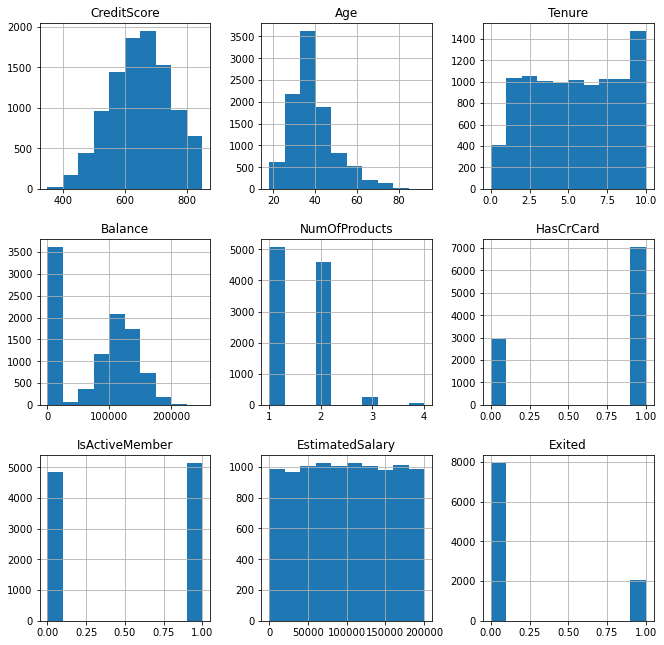

In [19]:
df.hist(figsize=(11,11))

plt.show()

#### **Bar plot about Geography of the customers**

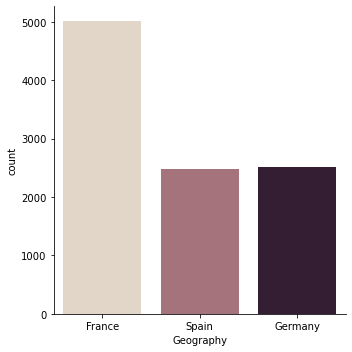

In [20]:
sns.catplot(x="Geography", kind="count", palette="ch:.25", data=df);

##### We see that 50% of customers are from france while the other customers in spain and Germany divided 25% each

#### **Bar plot about Gender of the customers**

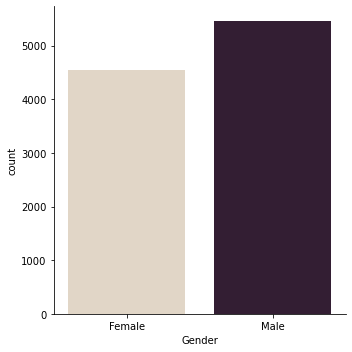

In [21]:
sns.catplot(x="Gender", kind="count", palette="ch:.25", data=df);

##### from plot above, we could say that we have males customers than females.

#### **Customers churn per Geography**

In [22]:
Geog_groupby = df.groupby('Geography')['Exited'].agg(Count='value_counts')
Geog_groupby

Count
Geography Exited       
France    0        4204
          1         810
Germany   0        1695
          1         814
Spain     0        2064
          1         413

In [23]:
# Edit dataframe for plotting (Counts)
geog_df = Geog_groupby
Geog_df = Geog_groupby.pivot_table(values='Count', index='Geography', columns=['Exited'])
Geog_df

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [24]:
# Calculate percentage within each class [0,1]
geo_per = Geog_groupby.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
geo_per.rename(columns={'Count': 'Percentage'}, inplace=True)
geo_per

Percentage
Geography Exited            
France    0            83.85
          1            16.15
Germany   0            67.56
          1            32.44
Spain     0            83.33
          1            16.67

In [25]:
# Edit dataframe for plotting (Percentages)
geo_per = geo_per.pivot_table(values='Percentage', index='Geography', columns=['Exited'])
geo_per

Exited,0,1
Geography,,
France,83.85,16.15
Germany,67.56,32.44
Spain,83.33,16.67


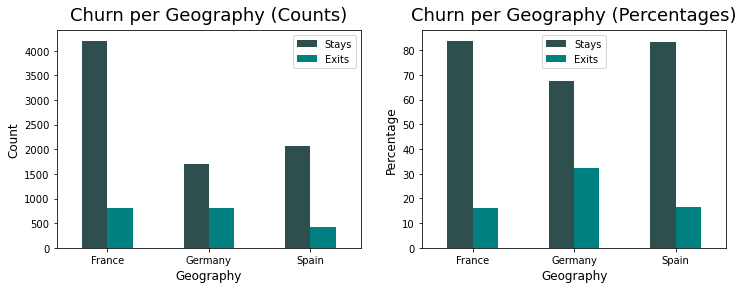

In [26]:
# Now, let’s plot (Counts, Percentages)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotting
Geog_df.plot(kind='bar', color=['darkslategrey', 'teal'], rot=0, ax=ax1)
geo_per.plot(kind='bar',color=['darkslategrey', 'teal'], rot=0, ax=ax2)

# Set Legend for each ax1, ax2
ax1.legend(['Stays', 'Exits'])
ax1.set_title('Churn per Geography (Counts)', fontsize=18, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Geography', size=12)


ax2.legend(['Stays', 'Exits'])
ax2.set_title('Churn per Geography (Percentages)', fontsize=18, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Geography', size=12);

##### As we can see, customers from Germany has more probability to churn from the bank.

#### **Customers churn per Gender**

In [27]:
Gen_group = df.groupby('Gender')['Exited'].agg(Count='value_counts')
Gen_group

Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

In [28]:
# Edit Gender dataframe for plotting (Counts)
gen_df = Gen_group
gen_df = Gen_group.pivot_table(values='Count', index='Gender', columns=['Exited'])
gen_df

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [29]:
# Calculate percentage within each class [0,1]
gen_per = Gen_group.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
gen_per.rename(columns={'Count': 'Percentage'}, inplace=True)
gen_per

Percentage
Gender Exited            
Female 0            74.93
       1            25.07
Male   0            83.54
       1            16.46

In [30]:
# Edit dataframe for plotting percentage
gen_per = gen_per.pivot_table(values='Percentage', index='Gender', columns=['Exited'])
gen_per

Exited,0,1
Gender,,
Female,74.93,25.07
Male,83.54,16.46


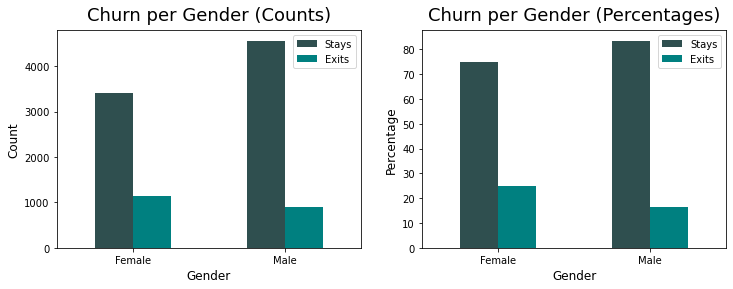

In [31]:
# Now, let’s plot (Counts, Percentages)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotting
gen_df.plot(kind='bar', color=['darkslategrey', 'teal'], rot=0, ax=ax1)
gen_per.plot(kind='bar',color=['darkslategrey', 'teal'], rot=0, ax=ax2)

# Set Legend for each ax1, ax2
ax1.legend(['Stays', 'Exits'])
ax1.set_title('Churn per Gender (Counts)', fontsize=18, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Gender', size=12)


ax2.legend(['Stays', 'Exits'])
ax2.set_title('Churn per Gender (Percentages)', fontsize=18, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Gender', size=12);

#### **Heatmap**

##### Creating dummy variables so we can use them in the heatmap

In [32]:
# Creating dummy variables for Geography
Geo_dummy = pd.get_dummies(df["Geography"])
Geo_dummy

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [33]:
# Creating dummy variables for Gender
Gen_dummy = pd.get_dummies(df["Gender"])
Gen_dummy

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [34]:
# merge the two dataframes 
Churn_dum = pd.concat([Geo_dummy, Gen_dummy, df], axis=1)
Churn_dum.drop(["Geography", "Gender"], axis=1, inplace= True)
Churn_dum

,France,Germany,Spain,Female,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,1,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,1,0,0,1,0,502,42,8,159660.80,3,1,0,113931.57,1
3,1,0,0,1,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,1,0,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,771,39,5,0.00,2,1,0,96270.64,0
9996,1,0,0,0,1,516,35,10,57369.61,1,1,1,101699.77,0
9997,1,0,0,1,0,709,36,7,0.00,1,0,1,42085.58,1
9998,0,1,0,0,1,772,42,3,75075.31,2,1,0,92888.52,1


In [35]:
Churn_dum.corr()

,France,Germany,Spain,Female,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
France,1.000000,-0.580359,-0.575418,-0.006772,0.006772,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955
Germany,-0.580359,1.000000,-0.332084,0.024628,-0.024628,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488
Spain,-0.575418,-0.332084,1.000000,-0.016889,0.016889,0.004780,-0.001685,0.003868,-0.134892,0.009039,-0.013480,0.016732,-0.006482,-0.052667
Female,-0.006772,0.024628,-0.016889,1.000000,-1.000000,0.002857,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
Male,0.006772,-0.024628,0.016889,-1.000000,1.000000,-0.002857,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
CreditScore,-0.008928,0.005538,0.004780,0.002857,-0.002857,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.039208,0.046897,-0.001685,0.027544,-0.027544,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.002848,-0.000567,0.003868,-0.014733,0.014733,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.231329,0.401110,-0.134892,-0.012087,0.012087,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.001230,-0.010419,0.009039,0.021859,-0.021859,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820


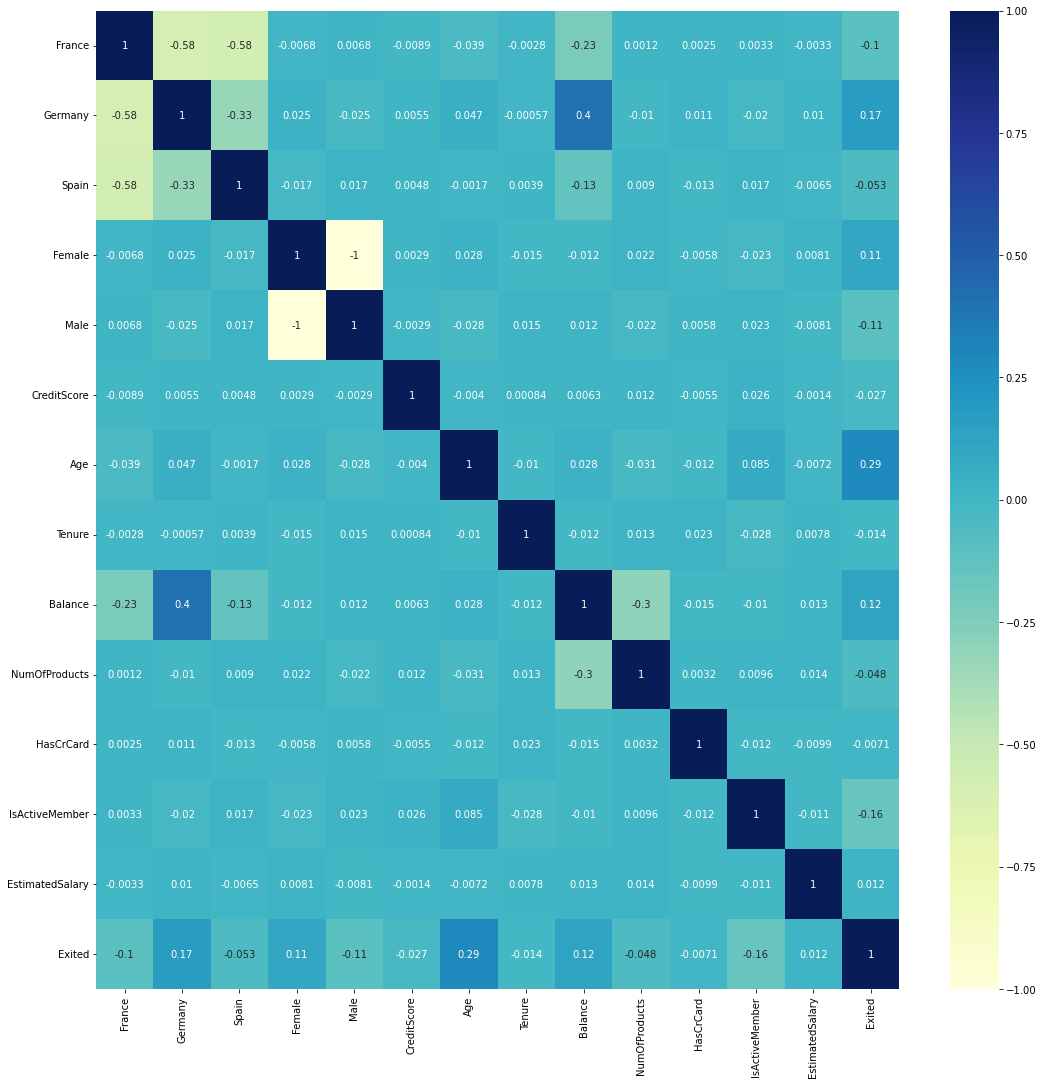

In [36]:
plt.figure(figsize= (18,18))
sns.heatmap(Churn_dum.corr(), annot= True, cmap='YlGnBu');
plt. savefig("correlation.png")

##### features that has big correlation with exiting the bank
> - Age (29%)
> - Customers in Germany (17%)
> - Female customers (11%) 

#### **Pairplot**

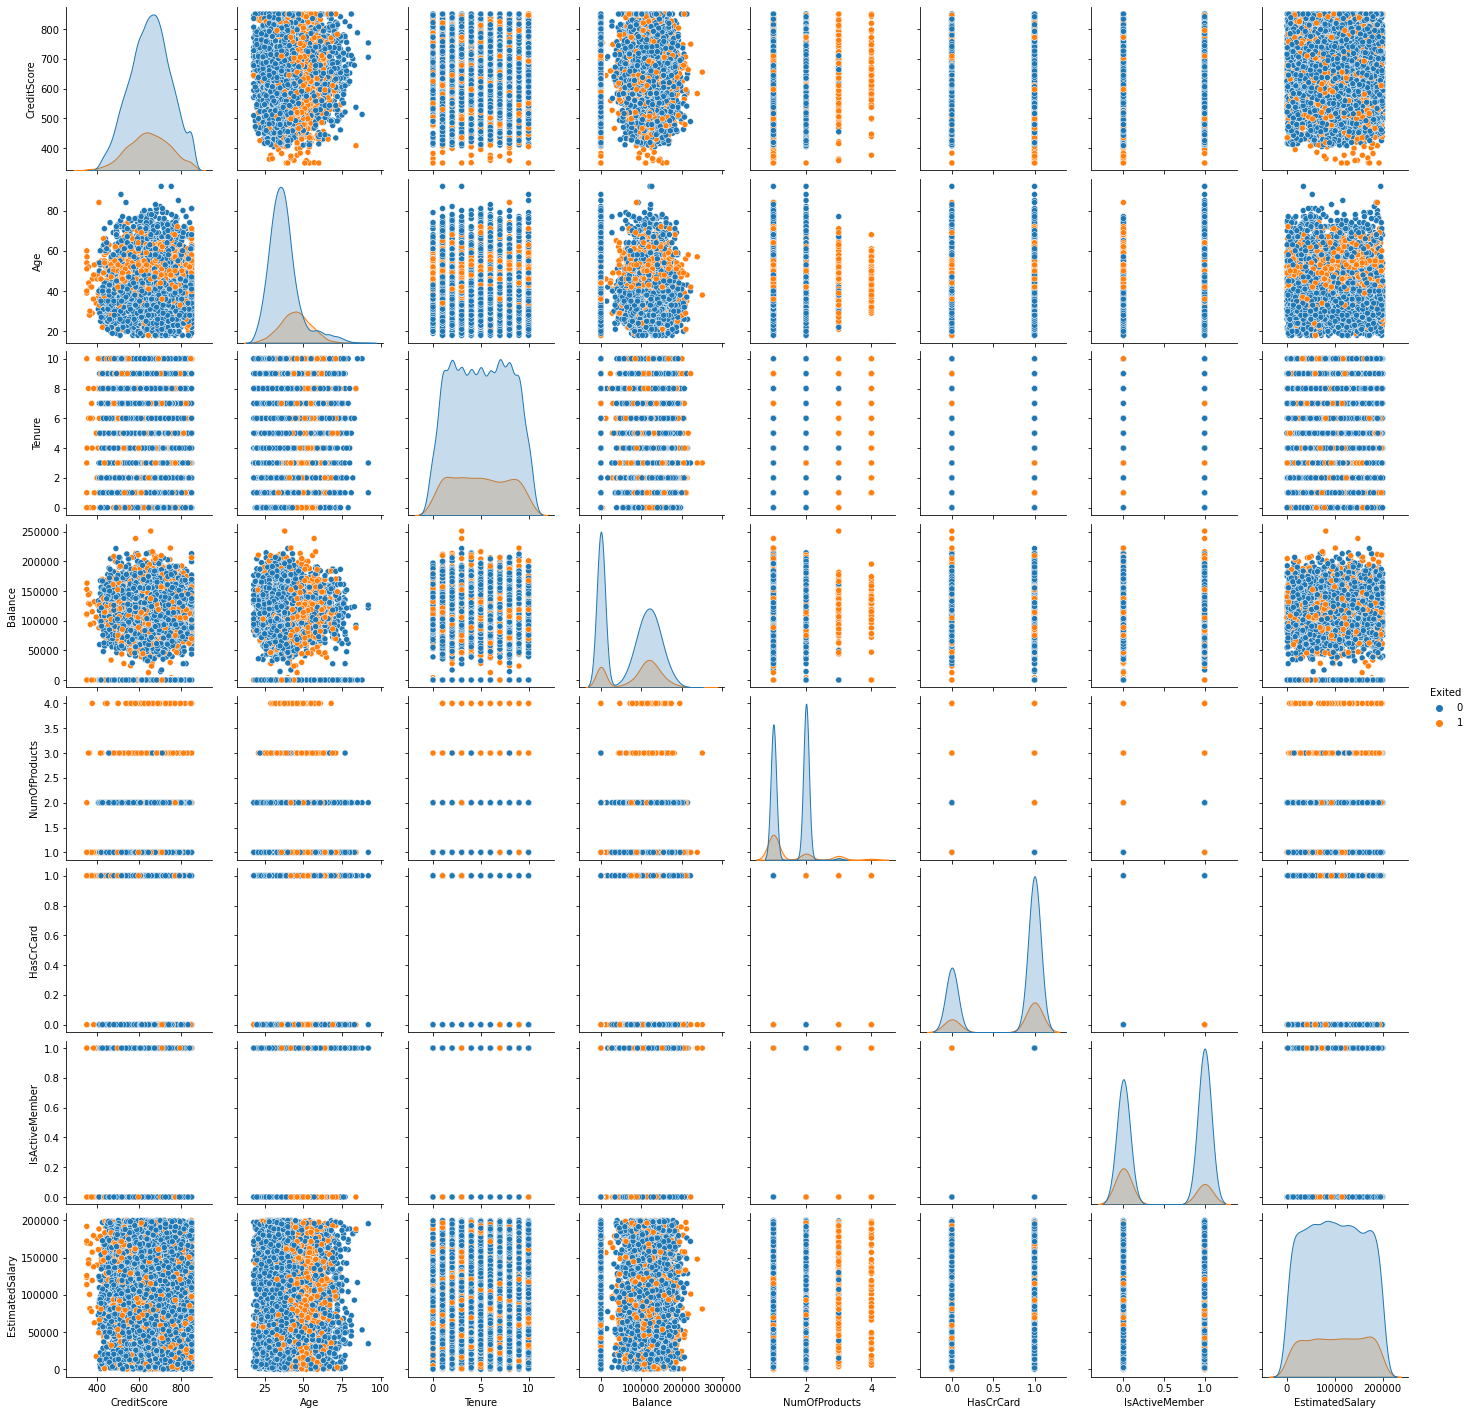

In [37]:
sns.pairplot(df, hue='Exited');

#### **Check if we have imbalanced classes**

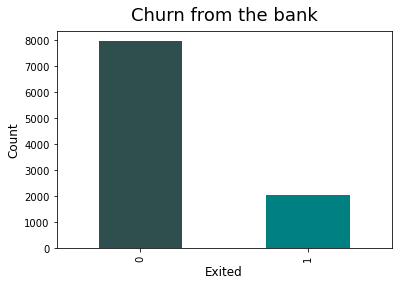

In [38]:
df_classba = df['Exited'].value_counts()

ax = df_classba.plot(kind='bar',color=['darkslategrey', 'teal'])

# Set title, labels
ax.set_title('Churn from the bank', fontsize=18, pad=10)
ax.set_ylabel('Count',size=12)
ax.set_xlabel('Exited', size=12);
plt. savefig("Imbalance.png")

In [39]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### we have imbalanced classes, so we should deal with it with some techniques such as:
> - oversampling 
> - SMOTE
> - class weight
> - best threshold max f1

### **Baseline model before oversampling: Logistic Regression**

#### **Splitting the data**

In [40]:
X_bl = df.drop('Exited',axis=1)
y_bl= df['Exited']

In [41]:
X_bl = X_bl.drop(['Geography', 'Gender'], axis=1)

In [42]:
X_train_bl, X_test_bl, y_train_bl, y_test_bl = train_test_split(X_bl, y_bl, test_size = 0.2, random_state=42)
X_train_bl, X_val_bl, y_train_bl, y_val_bl = train_test_split(X_train_bl, y_train_bl, test_size = 0.2, random_state=42)

In [43]:
logit = LogisticRegression(C = 10)
logit.fit(X_train_bl,y_train_bl)

train_accuracy = logit.score(X_train_bl, y_train_bl)  
valid_accuracy = logit.score(X_val_bl, y_val_bl)

In [44]:
print('Logistic regression before oversampling training set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_train_bl, logit.predict(X_train_bl)),
         precision_score(y_train_bl, logit.predict(X_train_bl)),
         recall_score(y_train_bl, logit.predict(X_train_bl)),
         f1_score(y_train_bl, logit.predict(X_train_bl))
        )
     )

print('--------------------------------------')

print('Logistic regression before oversampling validation set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_val_bl, logit.predict(X_val_bl)),
         precision_score(y_val_bl, logit.predict(X_val_bl)),
         recall_score(y_val_bl, logit.predict(X_val_bl)),
         f1_score(y_val_bl, logit.predict(X_val_bl))
        )
     )

Logistic regression before oversampling training set metrics: 
 Accuracy: 0.7869 
 Precision: 0.3757 
 Recall: 0.0539 
 F1: 0.0943
--------------------------------------
Logistic regression before oversampling validation set metrics: 
 Accuracy: 0.7894 
 Precision: 0.3864 
 Recall: 0.0520 
 F1: 0.0916


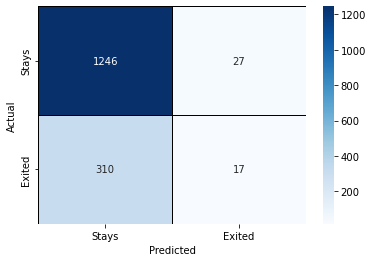

In [45]:
cm = confusion_matrix(y_val_bl, logit.predict(X_val_bl))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d", xticklabels = ["Stays", "Exited"] , yticklabels =["Stays", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt. savefig("baseline.png")

> #### Now, we will deal with our imbalance data with **oversampling**

In [46]:
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X_resampled_bl, y_resampled_bl = ros.fit_resample(X_bl, y_bl)

In [47]:
y_bl.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [48]:
y_resampled_bl.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

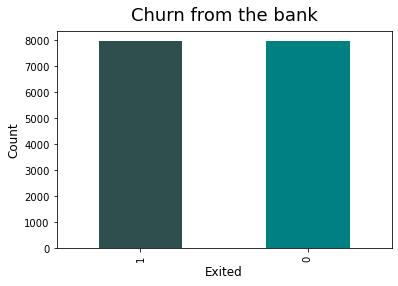

In [49]:
df_class = y_resampled_bl.value_counts()

ax = df_class.plot(kind='bar',color=['darkslategrey', 'teal'])

# Set title, labels
ax.set_title('Churn from the bank', fontsize=18, pad=10)
ax.set_ylabel('Count',size=12)
ax.set_xlabel('Exited', size=12);

In [50]:
X_tr_bl_rs,X_test_bl_rs,y_tr_bl_rs,y_test_bl_rs=train_test_split(X_resampled_bl,y_resampled_bl,test_size=0.20,random_state=42)
X_tr_bl_rs, X_val_bl_rs, y_tr_bl_rs, y_val_bl_rs = train_test_split(X_tr_bl_rs, y_tr_bl_rs, test_size = 0.2, random_state=42)

> Now, we have balance data

### **Baseline model after oversampling**

In [51]:
# After Oversampling
lr_os = LogisticRegression(C=10, solver='liblinear') 
lr_os.fit(X_tr_bl_rs, y_tr_bl_rs)

train_accuracy = lr_os.score(X_tr_bl_rs, y_tr_bl_rs)  
valid_accuracy = lr_os.score(X_val_bl_rs, y_val_bl_rs)  

In [52]:
print('Logistic regression after oversampling training set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_tr_bl_rs, lr_os.predict(X_tr_bl_rs)),
         precision_score(y_tr_bl_rs, lr_os.predict(X_tr_bl_rs)),
         recall_score(y_tr_bl_rs, lr_os.predict(X_tr_bl_rs)),
         f1_score(y_tr_bl_rs, lr_os.predict(X_tr_bl_rs))
        )
     )

print('--------------------------------------')

print('Logistic regression after oversampling validation set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_val_bl_rs, lr_os.predict(X_val_bl_rs)),
         precision_score(y_val_bl_rs, lr_os.predict(X_val_bl_rs)),
         recall_score(y_val_bl_rs, lr_os.predict(X_val_bl_rs)),
         f1_score(y_val_bl_rs, lr_os.predict(X_val_bl_rs))
        )
     )

Logistic regression after oversampling training set metrics: 
 Accuracy: 0.6659 
 Precision: 0.6636 
 Recall: 0.6800 
 F1: 0.6717
--------------------------------------
Logistic regression after oversampling validation set metrics: 
 Accuracy: 0.6641 
 Precision: 0.6636 
 Recall: 0.6801 
 F1: 0.6718


> As we can see, after we did oversampling, the accuracy has been reduced from 79% to 63%

##### Confusion matrix of the baseline model after overasmpling

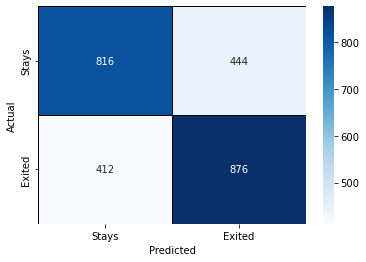

In [53]:
cm = confusion_matrix(y_val_bl_rs, lr_os.predict(X_val_bl_rs))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d", xticklabels = ["Stays", "Exited"] , yticklabels =["Stays", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt. savefig("baseline.png")

### **Feature Engineering**

> ##### Removing outliers

<AxesSubplot:xlabel='Age'>

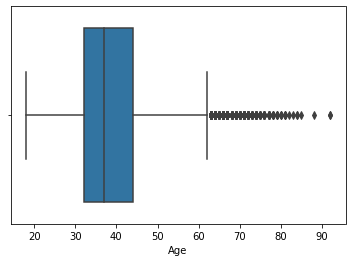

In [54]:
sns.boxplot(x="Age",data=df)

<AxesSubplot:xlabel='CreditScore'>

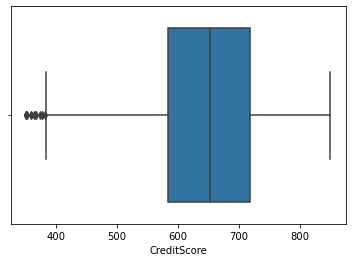

In [55]:
sns.boxplot(x="CreditScore",data=df)

> we can see there are outliers in Age and CreditScore, we will remove them.

In [56]:
#function to avoid repetitive code for removing outliers 
def drop_outliers(df, feature):
  iqr = 1.5 * (np.percentile(df[feature], 75) - np.percentile(df[feature], 25))
  df.drop(df[df[feature] > (iqr + np.percentile(df[feature], 75))].index, inplace=True)
  df.drop(df[df[feature] < (np.percentile(df[feature], 25) - iqr )].index, inplace=True)

In [57]:
drop_outliers(df, 'Age')
drop_outliers(df, 'CreditScore')

<AxesSubplot:xlabel='Age'>

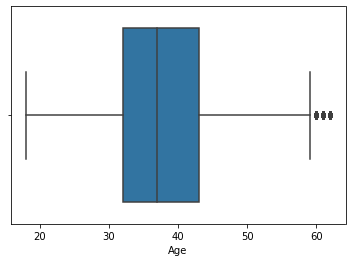

In [58]:
sns.boxplot(x="Age",data=df)

<AxesSubplot:xlabel='CreditScore'>

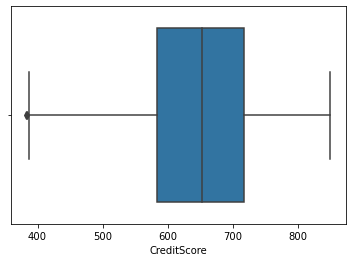

In [59]:
sns.boxplot(x="CreditScore",data=df)

In [60]:
df[df["Age"]>68].count()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [61]:
df[df["CreditScore"]<380].count()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

> ##### Create dummy variables for categorical features (Geography & Gender):

In [62]:
df['Gender'].value_counts()

Male      5259
Female    4368
Name: Gender, dtype: int64

In [63]:
df['Geography'].value_counts()

France     4826
Germany    2421
Spain      2380
Name: Geography, dtype: int64

> we see that Gender has a binary categories, so we will put it in one feature with 0 and 1

In [64]:
binary_feature = df.nunique()[df.nunique() == 2].keys().tolist()
le = LabelEncoder()
for i in binary_feature:
    df[i] = le.fit_transform(df[i])

In [65]:
df = pd.get_dummies(df, columns = ["Geography"])

In [66]:
df.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0
10,528,1,31,6,102016.72,2,0,0,80181.12,0,1,0,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9627 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9627 non-null   int64  
 1   Gender             9627 non-null   int32  
 2   Age                9627 non-null   int64  
 3   Tenure             9627 non-null   int64  
 4   Balance            9627 non-null   float64
 5   NumOfProducts      9627 non-null   int64  
 6   HasCrCard          9627 non-null   int64  
 7   IsActiveMember     9627 non-null   int64  
 8   EstimatedSalary    9627 non-null   float64
 9   Exited             9627 non-null   int64  
 10  Geography_France   9627 non-null   uint8  
 11  Geography_Germany  9627 non-null   uint8  
 12  Geography_Spain    9627 non-null   uint8  
dtypes: float64(2), int32(1), int64(7), uint8(3)
memory usage: 817.9 KB


In [68]:
df.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.004274,-0.012991,-0.000294,0.007582,0.011814,-0.001101,0.020118,0.002206,-0.016979,-0.011227,0.007147,0.005825
Gender,-0.004274,1.000000,-0.030718,0.014392,0.010347,-0.021201,0.006599,0.021972,-0.007114,-0.106548,0.009043,-0.027187,0.016861
Age,-0.012991,-0.030718,1.000000,-0.010538,0.041434,-0.032452,-0.016376,0.017816,-0.005630,0.358378,-0.050917,0.062851,-0.004196
Tenure,-0.000294,0.014392,-0.010538,1.000000,-0.012700,0.015211,0.019661,-0.027409,0.009779,-0.013226,-0.002208,-0.000206,0.002767
Balance,0.007582,0.010347,0.041434,-0.012700,1.000000,-0.304193,-0.013876,-0.007084,0.010063,0.116627,-0.229556,0.401663,-0.137900
NumOfProducts,0.011814,-0.021201,-0.032452,0.015211,-0.304193,1.000000,0.002652,0.011154,0.013427,-0.050845,0.000309,-0.010848,0.010552
HasCrCard,-0.001101,0.006599,-0.016376,0.019661,-0.013876,0.002652,1.000000,-0.012219,-0.010165,-0.008355,0.004869,0.010082,-0.015782
IsActiveMember,0.020118,0.021972,0.017816,-0.027409,-0.007084,0.011154,-0.012219,1.000000,-0.010165,-0.143182,-0.000122,-0.015886,0.016119
EstimatedSalary,0.002206,-0.007114,-0.005630,0.009779,0.010063,0.013427,-0.010165,-0.010165,1.000000,0.009405,-0.000785,0.010358,-0.009508
Exited,-0.016979,-0.106548,0.358378,-0.013226,0.116627,-0.050845,-0.008355,-0.143182,0.009405,1.000000,-0.103658,0.173121,-0.053969


#### In the feature engineering phase, we removed the outliers and we create dummy variables for the categorical data.

### **Modeling preprocessing**

In [69]:
X = df.drop('Exited',axis=1)
y = df['Exited']

> Oversampling using ROS

In [70]:
ros = RandomOverSampler(random_state=42)
# fit predictor and target variable
X_resampled, y_resampled = ros.fit_resample(X, y)

> Splitting the data

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

> shape of the data 

In [72]:
print("Training Data has",X_train.shape)
print('Test Data has',X_test.shape)
print("Validation Data has",X_val.shape)

Training Data has (9826, 12)
Test Data has (3071, 12)
Validation Data has (2457, 12)


> Feature scaling

In [73]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns = X.columns)
X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test,columns = X.columns)
X_val = sc.transform(X_val)
X_val = pd.DataFrame(X_val,columns = X.columns)

> Feature selection

In [74]:
# Using Lasso
model = Lasso(alpha=0.01, random_state=42)
model.fit(X_train,y_train)
model_d= pd.DataFrame(list(zip(X_train.columns,model.coef_)),columns=['feature','coefficient'])

In [75]:
model_d

,feature,coefficient
0,CreditScore,-0.000000
1,Gender,-0.039309
2,Age,0.188237
3,Tenure,-0.000000
4,Balance,0.024913
5,NumOfProducts,-0.008684
6,HasCrCard,-0.000000
7,IsActiveMember,-0.066692
8,EstimatedSalary,0.000000
9,Geography_France,-0.000000


In [76]:
# Using Recursive Feature Elimination
lr = LogisticRegression(max_iter=100)
rfe = RFE(lr, n_features_to_select=5)
model_l = rfe.fit(X_train, y_train)
pd.DataFrame(list(zip(X.columns,model_l.ranking_)), columns = ['feature','ranking'])

,feature,ranking
0,CreditScore,6
1,Gender,1
2,Age,1
3,Tenure,5
4,Balance,1
5,NumOfProducts,4
6,HasCrCard,7
7,IsActiveMember,1
8,EstimatedSalary,8
9,Geography_France,2


In [77]:
# Removing useless features from training & testing, and validation dataset which were depicted from lasso and RFE feature selection methods

X_train = X_train.drop(columns = ["CreditScore","Tenure","HasCrCard","EstimatedSalary","Geography_Spain","Geography_France"])
X_test = X_test.drop(columns = ["CreditScore","Tenure","HasCrCard","EstimatedSalary","Geography_Spain","Geography_France"])
X_val = X_val.drop(columns = ["CreditScore","Tenure","HasCrCard","EstimatedSalary","Geography_Spain","Geography_France"])

### **Building Models**

> #### **k-nearest neighbors**

In [78]:
knn = KNeighborsClassifier(n_neighbors=3) #n_neighbors = k
knn.fit(X_train,y_train)
print("K-Nearest Neighbor Train score: ",knn.score(X_train,y_train))
print("K-Nearest Neighbor Validation score: ",knn.score(X_val,y_val))
y_pred_knn = knn.predict(X_val)

K-Nearest Neighbor Train score:  0.8932424180744962
K-Nearest Neighbor Validation score:  0.8253968253968254


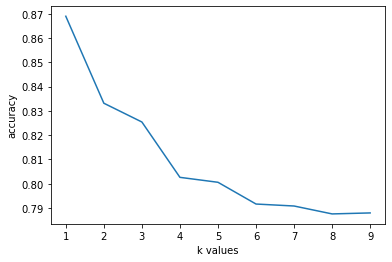

In [79]:
# Finding best k value between 1 and 10
score_list = []
for each in range(1,10):
    knn_k = KNeighborsClassifier(n_neighbors = each) # create a new knn model
    knn_k.fit(X_train,y_train)
    score_list.append(knn_k.score(X_val,y_val))

plt.plot(range(1,10),score_list) # x axis is in interval of 1 and 10
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [80]:
# finding max value in a list and it's index.
max_value = max(score_list) # finding max value in the list
inx_max = score_list.index(max_value)+1 # index of max value

print("k = ",inx_max," and maximum value is ", max_value)

k =  1  and maximum value is  0.8689458689458689


As we can see, k=1 have the maximum score value so we will use it

In [81]:
knn = KNeighborsClassifier(n_neighbors=1) # number of neighbors = k = 1
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [82]:
print('k-nearest neighbors training set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_train, knn.predict(X_train)),
         precision_score(y_train, knn.predict(X_train)),
         recall_score(y_train, knn.predict(X_train)),
         f1_score(y_train, knn.predict(X_train))
        )
     )

print('--------------------------------------')

print('k-nearest neighbors validation set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_val, knn.predict(X_val)),
         precision_score(y_val, knn.predict(X_val)),
         recall_score(y_val, knn.predict(X_val)),
         f1_score(y_val, knn.predict(X_val))
        )
     )

k-nearest neighbors training set metrics: 
 Accuracy: 0.9479 
 Precision: 0.9587 
 Recall: 0.9365 
 F1: 0.9475
--------------------------------------
k-nearest neighbors validation set metrics: 
 Accuracy: 0.8689 
 Precision: 0.8441 
 Recall: 0.9103 
 F1: 0.8760


Text(33.0, 0.5, 'Actual')

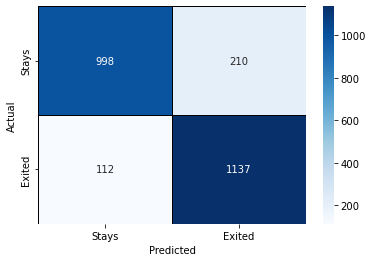

In [83]:
cm = confusion_matrix(y_val, knn.predict(X_val))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d", xticklabels = ["Stays", "Exited"] , yticklabels =["Stays", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

> #### **Logistic Regression**

In [84]:
logR = LogisticRegression(C=10, solver='liblinear') 
logR.fit(X_train, y_train) 

LogisticRegression(C=10, solver='liblinear')

In [85]:
print('Logistic Regression training set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_train, logR.predict(X_train)),
         precision_score(y_train, logR.predict(X_train)),
         recall_score(y_train, logR.predict(X_train)),
         f1_score(y_train, logR.predict(X_train))
        )
     )

print('--------------------------------------')

print('Logistic Regression validation set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_val, logR.predict(X_val)),
         precision_score(y_val, logR.predict(X_val)),
         recall_score(y_val, logR.predict(X_val)),
         f1_score(y_val, logR.predict(X_val))
        )
     )

Logistic Regression training set metrics: 
 Accuracy: 0.7262 
 Precision: 0.7317 
 Recall: 0.7174 
 F1: 0.7245
--------------------------------------
Logistic Regression validation set metrics: 
 Accuracy: 0.7468 
 Precision: 0.7610 
 Recall: 0.7318 
 F1: 0.7461


Text(33.0, 0.5, 'Actual')

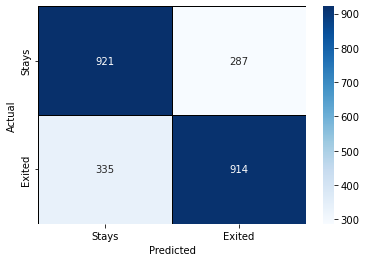

In [86]:
cm = confusion_matrix(y_val,logR.predict(X_val))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d", xticklabels = ["Stays", "Exited"] , yticklabels =["Stays", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

> #### **Random Forest Classifier**

In [87]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
print('Random Forest training set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_train, rfc.predict(X_train)),
         precision_score(y_train, rfc.predict(X_train)),
         recall_score(y_train, rfc.predict(X_train)),
         f1_score(y_train, rfc.predict(X_train))
        )
     )

print('--------------------------------------')

print('Random Forest validation set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_val, rfc.predict(X_val)),
         precision_score(y_val, rfc.predict(X_val)),
         recall_score(y_val, rfc.predict(X_val)),
         f1_score(y_val, rfc.predict(X_val))
        )
     )

Random Forest training set metrics: 
 Accuracy: 0.9618 
 Precision: 0.9653 
 Recall: 0.9584 
 F1: 0.9618
--------------------------------------
Random Forest validation set metrics: 
 Accuracy: 0.8820 
 Precision: 0.8523 
 Recall: 0.9287 
 F1: 0.8889


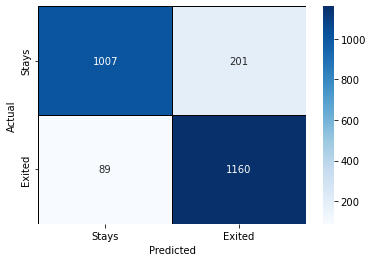

In [89]:
cm = confusion_matrix(y_val,rfc.predict(X_val))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d", xticklabels = ["Stays", "Exited"] , yticklabels =["Stays", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("BestModel.png")

> #### **Gaussian Naive Bayes Classifier**

In [90]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [91]:
print('Gaussian Naive Bayes training set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_train, nb.predict(X_train)),
         precision_score(y_train, nb.predict(X_train)),
         recall_score(y_train, nb.predict(X_train)),
         f1_score(y_train, nb.predict(X_train))
        )
     )

print('--------------------------------------')

print('Gaussian Naive Bayes validation set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_val, nb.predict(X_val)),
         precision_score(y_val, nb.predict(X_val)),
         recall_score(y_val, nb.predict(X_val)),
         f1_score(y_val, nb.predict(X_val))
        )
     )

Gaussian Naive Bayes training set metrics: 
 Accuracy: 0.7374 
 Precision: 0.7500 
 Recall: 0.7150 
 F1: 0.7321
--------------------------------------
Gaussian Naive Bayes validation set metrics: 
 Accuracy: 0.7444 
 Precision: 0.7638 
 Recall: 0.7198 
 F1: 0.7411


Text(33.0, 0.5, 'Actual')

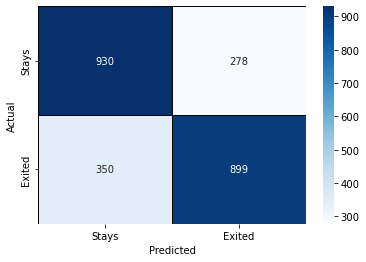

In [92]:
cm = confusion_matrix(y_val,nb.predict(X_val))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d", xticklabels = ["Stays", "Exited"] , yticklabels =["Stays", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

> #### **Support Vector Machine**

In [93]:
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [94]:
print('Support vector machine training set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_train, clf.predict(X_train)),
         precision_score(y_train, clf.predict(X_train)),
         recall_score(y_train, clf.predict(X_train)),
         f1_score(y_train, clf.predict(X_train))
        )
     )

print('--------------------------------------')

print('Support vector machine validation set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_val, clf.predict(X_val)),
         precision_score(y_val, clf.predict(X_val)),
         recall_score(y_val, clf.predict(X_val)),
         f1_score(y_val, clf.predict(X_val))
        )
     )

Support vector machine training set metrics: 
 Accuracy: 0.7251 
 Precision: 0.7373 
 Recall: 0.7024 
 F1: 0.7194
--------------------------------------
Support vector machine validation set metrics: 
 Accuracy: 0.7424 
 Precision: 0.7655 
 Recall: 0.7110 
 F1: 0.7372


Text(33.0, 0.5, 'Actual')

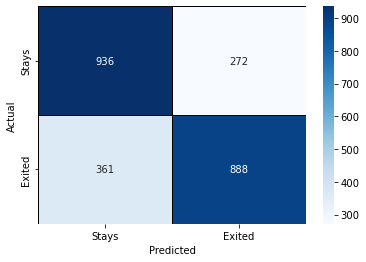

In [95]:
cm = confusion_matrix(y_val,clf.predict(X_val))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d", xticklabels = ["Stays", "Exited"] , yticklabels =["Stays", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

> #### **Decision Tree Classifier**

In [96]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [97]:
print('Decision tree classifier training set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_train, dtree.predict(X_train)),
         precision_score(y_train, dtree.predict(X_train)),
         recall_score(y_train, dtree.predict(X_train)),
         f1_score(y_train, dtree.predict(X_train))
        )
     )

print('--------------------------------------')

print('Decision tree classifier validation set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_val, dtree.predict(X_val)),
         precision_score(y_val, dtree.predict(X_val)),
         recall_score(y_val, dtree.predict(X_val)),
         f1_score(y_val, dtree.predict(X_val))
        )
     )

Decision tree classifier training set metrics: 
 Accuracy: 0.9619 
 Precision: 0.9668 
 Recall: 0.9570 
 F1: 0.9619
--------------------------------------
Decision tree classifier validation set metrics: 
 Accuracy: 0.8751 
 Precision: 0.8433 
 Recall: 0.9263 
 F1: 0.8829


Text(33.0, 0.5, 'Actual')

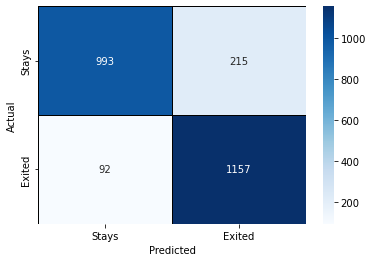

In [98]:
cm = confusion_matrix(y_val,dtree.predict(X_val))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d", xticklabels = ["Stays", "Exited"] , yticklabels =["Stays", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

> #### **XGBClassifier: eXtreme Gradient Boosting**

In [99]:
xgb = XGBClassifier(n_estimators=100, max_deoth=3, learning_rate=.71)
xgb.fit(X_train, y_train)

[10:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_deoth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.71, max_delta_step=0,
              max_deoth=3, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
print('XGB classifier training set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_train, xgb.predict(X_train)),
         precision_score(y_train, xgb.predict(X_train)),
         recall_score(y_train, xgb.predict(X_train)),
         f1_score(y_train, xgb.predict(X_train))
        )
     )

print('--------------------------------------')

print('XGB validation set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_val, xgb.predict(X_val)),
         precision_score(y_val, xgb.predict(X_val)),
         recall_score(y_val, xgb.predict(X_val)),
         f1_score(y_val, xgb.predict(X_val))
        )
     )

XGB classifier training set metrics: 
 Accuracy: 0.9417 
 Precision: 0.9407 
 Recall: 0.9432 
 F1: 0.9420
--------------------------------------
XGB validation set metrics: 
 Accuracy: 0.8738 
 Precision: 0.8565 
 Recall: 0.9031 
 F1: 0.8792


Text(33.0, 0.5, 'Actual')

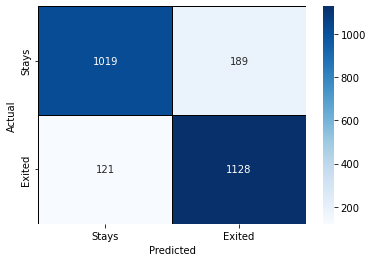

In [101]:
cm = confusion_matrix(y_val,xgb.predict(X_val))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d", xticklabels = ["Stays", "Exited"] , yticklabels =["Stays", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

#### **ROC Curve**

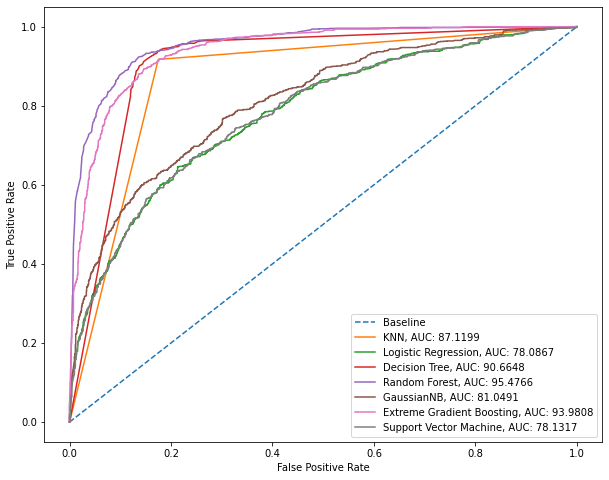

<Figure size 432x288 with 0 Axes>

In [102]:
fig, ax = plt.subplots(figsize=(10,8))

# KNN 
ypred_prob1 = knn.predict_proba(X_test)
classKNN_probs = ypred_prob1[:, 1]

# Logistic Regression 
ypred_prob2 = logR.predict_proba(X_test)
classlog_probs = ypred_prob2[:, 1]

# Decision tree
ypred_prob3 = dtree.predict_proba(X_test)
classtree_probs = ypred_prob3[:, 1]

# SVM
ypred_prob3 = clf.predict_proba(X_test)
classSVM_probs = ypred_prob3[:, 1]

# Random Forest
ypred_prob4 = rfc.predict_proba(X_test)
classrf_probs = ypred_prob4[:, 1]

# NB
ypred_prob5 = nb.predict_proba(X_test)
classNB_probs = ypred_prob5[:, 1]

# xgb
ypred_prob6 = xgb.predict_proba(X_test)
classgb_probs = ypred_prob6[:, 1]

# plot baseline roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
# calculate roc curve for model
fpr1, tpr1, _ = roc_curve(y_test, classKNN_probs)
fpr2, tpr2, _ = roc_curve(y_test, classlog_probs)
fpr3, tpr3, _ = roc_curve(y_test, classtree_probs)
fpr4, tpr4, _ = roc_curve(y_test, classrf_probs)
fpr5, tpr5, _ = roc_curve(y_test, classNB_probs)
fpr6, tpr6, _ = roc_curve(y_test, classgb_probs)
fpr7, tpr7, _ = roc_curve(y_test, classSVM_probs)

auc1 = round(100*(roc_auc_score(y_test, classKNN_probs)), 4)
auc2 = round(100*(roc_auc_score(y_test, classlog_probs)), 4)
auc3 = round(100*(roc_auc_score(y_test, classtree_probs)), 4)
auc4 = round(100*(roc_auc_score(y_test, classrf_probs)), 4)
auc5 = round(100*(roc_auc_score(y_test, classNB_probs)), 4)
auc6 = round(100*(roc_auc_score(y_test, classgb_probs)), 4)
auc7 = round(100*(roc_auc_score(y_test, classSVM_probs)), 4)

# plot model roc curve
plt.plot(fpr1, tpr1, linestyle='-', label=f'KNN, AUC: {auc1}')
plt.plot(fpr2, tpr2, linestyle='-', label=f'Logistic Regression, AUC: {auc2}')
plt.plot(fpr3, tpr3, linestyle='-', label=f'Decision Tree, AUC: {auc3}')
plt.plot(fpr4, tpr4, linestyle='-', label=f'Random Forest, AUC: {auc4}')
plt.plot(fpr5, tpr5, linestyle='-', label=f'GaussianNB, AUC: {auc5}')
plt.plot(fpr6, tpr6, linestyle='-', label=f'Extreme Gradient Boosting, AUC: {auc6}')
plt.plot(fpr7, tpr7, linestyle='-', label=f'Support Vector Machine, AUC: {auc7}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
plt.savefig("ROC.png")


> #### **Voting Classifier**

In [103]:
# Load pre-trained/tuned models

model_names = ["logR", "knn", 'dtree',"rfc", "nb", "clf", "xgb"]
model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))
model_list

[('logR', LogisticRegression(C=10, solver='liblinear')),
 ('knn', KNeighborsClassifier(n_neighbors=1)),
 ('dtree', DecisionTreeClassifier()),
 ('rfc', RandomForestClassifier()),
 ('nb', GaussianNB()),
 ('clf', SVC(kernel='linear', probability=True)),
 ('xgb',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.71, max_delta_step=0,
                max_deoth=3, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=1, predictor='auto', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None))]

In [104]:
# Quick peek at each model performance

for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} train_score: {curr_model.score(X_train, y_train)}')
    print(f'{model_name} val_score: {curr_model.score(X_val, y_val)}')
    print(f'{model_name} test_score: {curr_model.score(X_test, y_test)}')
    print('--------------------------------------')

logR train_score: 0.7262365153673926
logR val_score: 0.7468457468457469
logR test_score: 0.7066102246825139
--------------------------------------
knn train_score: 0.9478933441888866
knn val_score: 0.8689458689458689
knn test_score: 0.8700748941712797
--------------------------------------
dtree train_score: 0.9619377162629758
dtree val_score: 0.8750508750508751
dtree test_score: 0.8811462064474113
--------------------------------------
rfc train_score: 0.9618359454508447
rfc val_score: 0.881969881969882
rfc test_score: 0.8837512211006187
--------------------------------------
nb train_score: 0.7374313047018115
nb val_score: 0.7444037444037443
nb test_score: 0.7219146857701074
--------------------------------------
clf train_score: 0.7251170364339508
clf val_score: 0.7423687423687424
clf test_score: 0.7082383588407685
--------------------------------------
xgb train_score: 0.9416853246488907
xgb val_score: 0.8738298738298739
xgb test_score: 0.868772386844676
---------------------------

In [105]:
voting_classifer = VotingClassifier(estimators = model_list,
                                    voting = 'hard', #<-- sklearn calls this hard voting
                                    n_jobs = -1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('logR',
                              LogisticRegression(C=10, solver='liblinear')),
                             ('knn', KNeighborsClassifier(n_neighbors=1)),
                             ('dtree', DecisionTreeClassifier()),
                             ('rfc', RandomForestClassifier()),
                             ('nb', GaussianNB()),
                             ('clf', SVC(kernel='linear', probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=...
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.71,
                                            max_delta_step=0, max_deoth=3,
                  

In [106]:
y_pred = voting_classifer.predict(X_train)
accuracy_score(y_train, y_pred)

0.9438225117036434

In [107]:
accuracy_score(y_test, voting_classifer.predict(X_test))

0.8668186258547704

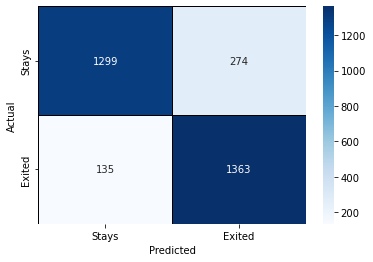

In [118]:
cm = confusion_matrix(y_test,voting_classifer.predict(X_test))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d", xticklabels = ["Stays", "Exited"] , yticklabels =["Stays", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('maxvoting.png')

It is not giving us better accuracy, it might be our data doesn’t benefit for it or because it’s too complex for our data.

### **Best Model (Random Forest Classifier)**

Now, we will test our best model

In [109]:
bm = RandomForestClassifier(n_estimators=100)
bm.fit(X_train,y_train)

RandomForestClassifier()

In [121]:
print('Random forest testing set metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy_score(y_test, bm.predict(X_test)),
         precision_score(y_test, bm.predict(X_test)),
         recall_score(y_test, bm.predict(X_test)),
         f1_score(y_test, bm.predict(X_test))
        )
     )

Random forest testing set metrics: 
 Accuracy: 0.8828 
 Precision: 0.8411 
 Recall: 0.9366 
 F1: 0.8863


Text(33.0, 0.5, 'Actual')

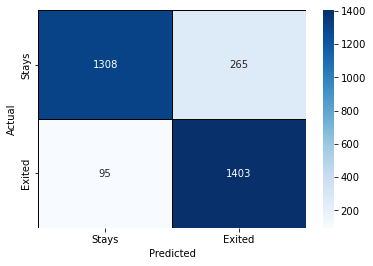

In [111]:
cm = confusion_matrix(y_test,bm.predict(X_test))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt="d", xticklabels = ["Stays", "Exited"] , yticklabels =["Stays", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

> ### Dabl 

> dabl speeds up the modeling workflow by training various baseline machine learning algorithms on the training data and returns with the best-performing model. dabl makes simple assumptions and generates metrics for baseline models.

In [116]:
survivor_classifier = dabl.SimpleClassifier(random_state=42).fit(X_train, y_train)

Running DummyClassifier()
accuracy: 0.502 average_precision: 0.498 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.334
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.502 average_precision: 0.498 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.334

Running GaussianNB()
accuracy: 0.719 average_precision: 0.776 roc_auc: 0.792 recall_macro: 0.719 f1_macro: 0.719
=== new best GaussianNB() (using recall_macro):
accuracy: 0.719 average_precision: 0.776 roc_auc: 0.792 recall_macro: 0.719 f1_macro: 0.719

Running MultinomialNB()
accuracy: 0.637 average_precision: 0.687 roc_auc: 0.702 recall_macro: 0.637 f1_macro: 0.637
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.700 average_precision: 0.632 roc_auc: 0.700 recall_macro: 0.700 f1_macro: 0.697
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.766 average_precision: 0.819 roc_auc: 0.846 recall_macro: 0.766 f1_macro: 0.766
=== new best DecisionTreeClassifier(class_we

>**In Conclusion**, after examen multiple classification models, it is clear that the best model to predict whether a customer is going to leave or not is random forest classification model, which did not have an overfit and gave the highest validation accuracy. The last step for this project is to train the best model using both training and validation sets (90% of the data), and test it using the splatted data for testing (10% of the data set). Then both the accuracy and F1 score for both the training and testing will be printed. Accuracy for the training set is 0.9619 and for the testing set 0.8824 as shown above.